In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/cleaned_census_data.csv")

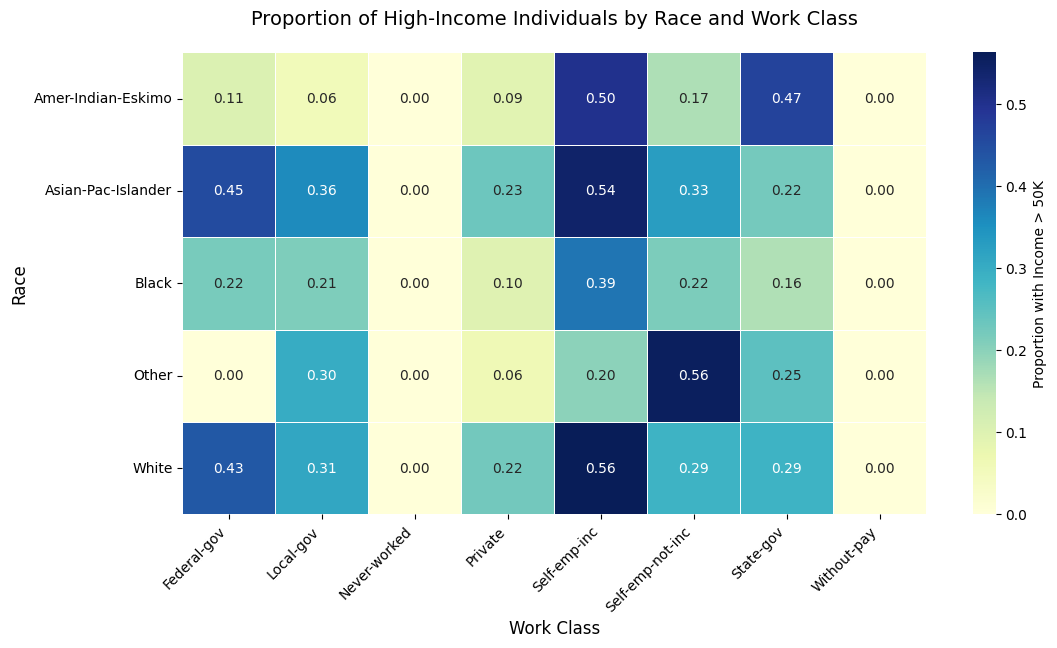

Sample counts for each race-workclass combination:
workclass           Federal-gov  Local-gov  Never-worked  Private  \
race                                                                
Amer-Indian-Eskimo           19         36             0      215   
Asian-Pac-Islander           44         39             0      778   
Black                       169        288             2     2389   
Other                         7         10             0      236   
White                       721       1720             5    20914   

workclass           Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay  
race                                                                        
Amer-Indian-Eskimo             2                24         15            0  
Asian-Pac-Islander            46                73         58            1  
Black                         23                93        159            1  
Other                          5                 9          4            0  
Whi

In [2]:
df["high_income"] = df["income"].map({">50K": 1, "<=50K": 0}).astype(int)

# Calculate proportion of high-income individuals for each race-workclass combination
income_proportions = (
    df.groupby(["race", "workclass"])["high_income"].mean().reset_index()
)

# Reshape data for the heatmap using pivot
heatmap_data = income_proportions.pivot(
    index="race", columns="workclass", values="high_income"
)

# Handle combinations that don't exist
heatmap_data = heatmap_data.fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Proportion with Income > 50K"},
)

# Customize map
plt.title(
    "Proportion of High-Income Individuals by Race and Work Class", pad=20, fontsize=14
)
plt.xlabel("Work Class", fontsize=12)
plt.ylabel("Race", fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.show()

# Additional analysis: Create a summary table with sample counts
sample_counts = df.groupby(["race", "workclass"]).size().reset_index(name="count")
sample_counts_pivot = sample_counts.pivot(
    index="race", columns="workclass", values="count"
)
sample_counts_pivot = sample_counts_pivot.fillna(0).astype(int)

print("Sample counts for each race-workclass combination:")
print(sample_counts_pivot)